In [ ]:
from prompt import (
    VIOLATION_QUERY_FORMAT,
    GENERAL_INFORMATION_QUERY_FORMAT,
    DECISION_VIOLATION,
    DECISION_GENERAL,
    ANSWER
)
from q_process import QuestionProcess

In [ ]:
processor = QuestionProcess()

In [ ]:
question = "Nếu không đội mũ bảo hiểm thì sẽ bị phạt bao nhiêu tiền"

In [ ]:
processed_question = processor.process_question(question)
processed_question

In [ ]:
promt = VIOLATION_QUERY_FORMAT.format(
    processed_question = processed_question["processed_question"]
)

In [ ]:
import openai


response = openai.ChatCompletion.create(
    model="gpt-4o-mini",  
    messages=[
        {"role": "system", "content": "You are a helpful assistant that provides information about traffic violations."},
        {"role": "user", "content": promt}
    ],
    temperature=0.2,
    max_tokens=128
)

# Extract and print the response
answer = response.choices[0].message.content
print(answer)

In [ ]:
import json
import re
json_pattern = r'```json\n(.*?)```'
match = re.search(json_pattern, answer, re.DOTALL)
if match:
    json_str = match.group(1)
    print("\nMatch found! Extracted JSON string:")
    print(json_str)
    
    try:
        json_data = json.loads(json_str)
        print("\nSuccessfully parsed JSON data:")
        print(json_data)
        print(f"\nFormatted query: {json_data.get('formatted_query', 'Not found')}")
    except json.JSONDecodeError as e:
        print(f"\nJSON parsing error: {e}")
else:
    print("\nNo match found with the pattern!")
    print("Looking at the raw response in detail:")
    print(repr(answer))  # This shows escape characters
    
    # Let's try alternative patterns
    alternative_patterns = [
        r'{.*}',  # Simple JSON without code blocks
        r'```\n(.*)\n```',  # Code blocks but no language specified
        r'```json\s+(.*)\s+```',  # Different spacing
        r'```(.*?)```'  # Any code block
    ]
    
    for pattern in alternative_patterns:
        alt_match = re.search(pattern, answer, re.DOTALL)
        if alt_match:
            print(f"\nAlternative pattern matched: {pattern}")
            alt_json_str = alt_match.group(1)
            print("Extracted content:")
            print(alt_json_str)
            try:
                # Try to parse it as JSON 
                json.loads(alt_json_str)
                print("This could be parsed as valid JSON")
            except:
                print("This is not valid JSON")

In [1]:
a = "a7d9z66h33n121mm"

In [2]:
list_num =[]
for i in a:
    if i.isdigit():
        list_num.append(i)

In [3]:
list_num

['7', '9', '6', '6', '3', '3', '1', '2', '1']

In [ ]:
list_num.sort()
list_num[-1]

'9'

In [1]:
import json

def read_and_count_json(file_path):
    try:
        # Open and read the JSON file
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        
        # Count total entries
        total_entries = len(data)
        
        # Print basic information
        print(f"Total entries in the file: {total_entries}")
        
        # Optional: Additional analysis
        if isinstance(data, list):
            print("\nDetailed Information:")
            # Example of additional analysis
            for index, entry in enumerate(data, 1):
                print(f"Entry {index}:")
                # Print keys of each entry
                print("  Keys:", list(entry.keys()))
        
        return data
    
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Example usage
file_path = '/home/drissdo/Desktop/VN_LAW_QA_SYSTEM/qa.json'
json_data = read_and_count_json(file_path)

Total entries in the file: 217

Detailed Information:
Entry 1:
  Keys: ['question', 'answer']
Entry 2:
  Keys: ['question', 'answer']
Entry 3:
  Keys: ['question', 'answer']
Entry 4:
  Keys: ['question', 'answer']
Entry 5:
  Keys: ['question', 'answer']
Entry 6:
  Keys: ['question', 'answer']
Entry 7:
  Keys: ['question', 'answer']
Entry 8:
  Keys: ['question', 'answer']
Entry 9:
  Keys: ['question', 'answer']
Entry 10:
  Keys: ['question', 'answer']
Entry 11:
  Keys: ['question', 'answer']
Entry 12:
  Keys: ['question', 'answer']
Entry 13:
  Keys: ['question', 'answer']
Entry 14:
  Keys: ['question', 'answer']
Entry 15:
  Keys: ['question', 'answer']
Entry 16:
  Keys: ['question', 'answer']
Entry 17:
  Keys: ['question', 'answer']
Entry 18:
  Keys: ['question', 'answer']
Entry 19:
  Keys: ['question', 'answer']
Entry 20:
  Keys: ['question', 'answer']
Entry 21:
  Keys: ['question', 'answer']
Entry 22:
  Keys: ['question', 'answer']
Entry 23:
  Keys: ['question', 'answer']
Entry 24:
  

In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 6.0 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 6.8 MB/s eta 0:00:00


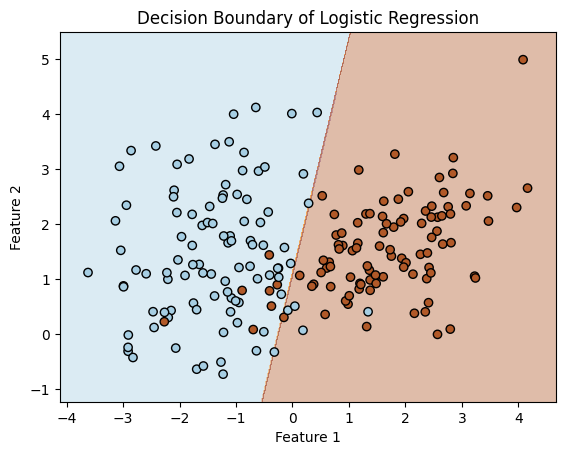

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Step 1: Generate a synthetic dataset
np.random.seed(42)  # For reproducibility
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)

# Step 2: Train a Logistic Regression model
model = LogisticRegression()
model.fit(X, y)

# Step 3: Define a function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid to evaluate the model over the entire feature space
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and the data points
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    
    # Add labels and title
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of Logistic Regression')
    plt.show()

# Step 4: Plot the decision boundary
plot_decision_boundary(X, y, model)